In [1]:
# Unzip
import os, zipfile

ZIP_PATH = "/content/F1 Datasets.zip"
EXTRACT_DIR = "/content/f1_datasets"

os.makedirs(EXTRACT_DIR, exist_ok=True)
with zipfile.ZipFile(ZIP_PATH, "r") as z: z.extractall(EXTRACT_DIR)

csv_paths = [os.path.join(r,f) for r,_,fs in os.walk(EXTRACT_DIR) for f in fs if f.lower().endswith(".csv")]
print(f"Found {len(csv_paths)} CSV files:")
for p in sorted(csv_paths)[:30]: print(" -", p)

DATA_DIR = os.path.commonpath([os.path.dirname(p) for p in csv_paths]) if csv_paths else None
print("DATA_DIR =", DATA_DIR)

Found 14 CSV files:
 - /content/f1_datasets/F1 Datasets/circuits.csv
 - /content/f1_datasets/F1 Datasets/constructor_results.csv
 - /content/f1_datasets/F1 Datasets/constructor_standings.csv
 - /content/f1_datasets/F1 Datasets/constructors.csv
 - /content/f1_datasets/F1 Datasets/driver_standings.csv
 - /content/f1_datasets/F1 Datasets/drivers.csv
 - /content/f1_datasets/F1 Datasets/lap_times.csv
 - /content/f1_datasets/F1 Datasets/pit_stops.csv
 - /content/f1_datasets/F1 Datasets/qualifying.csv
 - /content/f1_datasets/F1 Datasets/races.csv
 - /content/f1_datasets/F1 Datasets/results.csv
 - /content/f1_datasets/F1 Datasets/seasons.csv
 - /content/f1_datasets/F1 Datasets/sprint_results.csv
 - /content/f1_datasets/F1 Datasets/status.csv
DATA_DIR = /content/f1_datasets/F1 Datasets


In [2]:
import os, pandas as pd

if "DATA_DIR" not in globals() or not DATA_DIR:
    DATA_DIR = "/content/f1_datasets"

races        = pd.read_csv(os.path.join(DATA_DIR, "races.csv"))
results      = pd.read_csv(os.path.join(DATA_DIR, "results.csv"))
drivers      = pd.read_csv(os.path.join(DATA_DIR, "drivers.csv"))
constructors = pd.read_csv(os.path.join(DATA_DIR, "constructors.csv"))

# Removing whitespaces in drivername column
drivers["driverName"] = drivers["forename"].astype(str).str.strip() + " " + drivers["surname"].astype(str).str.strip()

# Merging columns
merged = (
    results[["raceId","driverId","constructorId","grid","position","positionOrder","points"]]
    .merge(races[["raceId","year","name"]].rename(columns={"name":"raceName"}), on="raceId", how="left")
    .merge(drivers[["driverId","driverName"]], on="driverId", how="left")
    .merge(constructors[["constructorId","name"]].rename(columns={"name":"constructorName"}), on="constructorId", how="left")
)

# creating 'finish_pos' column
merged["finish_pos"] = merged["positionOrder"] if "positionOrder" in merged.columns else pd.to_numeric(merged["position"], errors="coerce")

print("merged:", merged.shape)
print(merged.head(10))

merged.to_csv("merged_F1.csv", index=False)

merged: (26759, 12)
   raceId  driverId  constructorId  grid position  positionOrder  points  \
0      18         1              1     1        1              1    10.0   
1      18         2              2     5        2              2     8.0   
2      18         3              3     7        3              3     6.0   
3      18         4              4    11        4              4     5.0   
4      18         5              1     3        5              5     4.0   
5      18         6              3    13        6              6     3.0   
6      18         7              5    17        7              7     2.0   
7      18         8              6    15        8              8     1.0   
8      18         9              2     2       \N              9     0.0   
9      18        10              7    18       \N             10     0.0   

   year               raceName          driverName constructorName  finish_pos  
0  2008  Australian Grand Prix      Lewis Hamilton         McL

### Top 10 Drivers by wins





Top 10 drivers by wins:
 driverName
Lewis Hamilton        105
Michael Schumacher     91
Max Verstappen         63
Sebastian Vettel       53
Alain Prost            51
Ayrton Senna           41
Fernando Alonso        32
Nigel Mansell          31
Jackie Stewart         27
Niki Lauda             25
dtype: int64


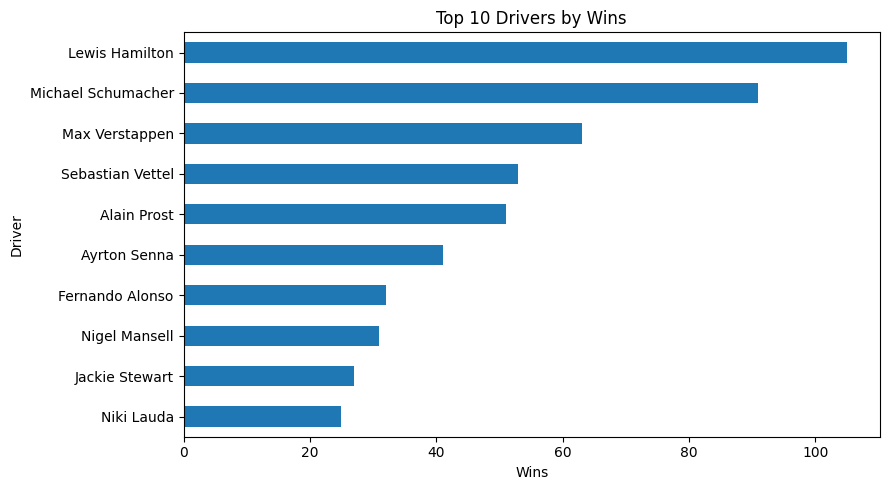

In [3]:
import os, pandas as pd, matplotlib.pyplot as plt
merged = pd.read_csv("merged_F1.csv")
wins_driver = (merged.loc[merged["finish_pos"] == 1]
                        .groupby("driverName").size()
                        .sort_values(ascending=False).head(10))

print("Top 10 drivers by wins:\n", wins_driver)
os.makedirs("outputs", exist_ok=True)
wins_driver.reset_index().rename(columns={0:"wins"}).to_csv("outputs/driver_wins_top10.csv", index=False)

plt.figure(figsize=(9,5))
wins_driver.iloc[::-1].plot(kind="barh")
plt.title("Top 10 Drivers by Wins"); plt.xlabel("Wins"); plt.ylabel("Driver")
plt.tight_layout(); plt.show()

### Top 10 Constructors By wins

Top 10 constructors by wins:
 constructorName
Ferrari       249
McLaren       185
Mercedes      129
Red Bull      122
Williams      114
Team Lotus     45
Renault        35
Benetton       27
Tyrrell        23
Brabham        23
dtype: int64


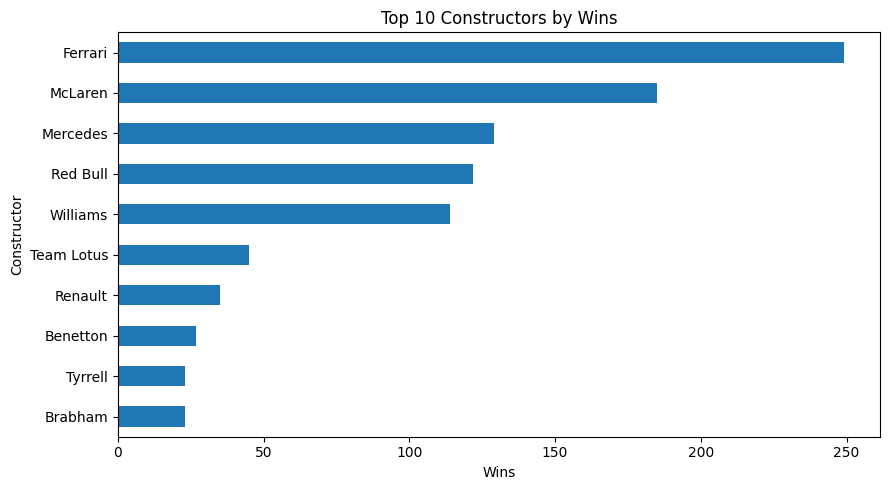

In [4]:
import pandas as pd, matplotlib.pyplot as plt
merged = pd.read_csv("merged_F1.csv")

wins_team = (merged.loc[merged["finish_pos"] == 1]
                      .groupby("constructorName").size()
                      .sort_values(ascending=False).head(10))

print("Top 10 constructors by wins:\n", wins_team)
wins_team.reset_index().rename(columns={0:"wins"}).to_csv("outputs/constructor_wins_top10.csv", index=False)

plt.figure(figsize=(9,5))
wins_team.iloc[::-1].plot(kind="barh")
plt.title("Top 10 Constructors by Wins"); plt.xlabel("Wins"); plt.ylabel("Constructor")
plt.tight_layout(); plt.show()

### F1 Season Champions (2000 - 2024)

 year         driverName  points
 2000 Michael Schumacher   108.0
 2001 Michael Schumacher   123.0
 2002 Michael Schumacher   144.0
 2003 Michael Schumacher    93.0
 2004 Michael Schumacher   148.0
 2005    Fernando Alonso   133.0
 2006    Fernando Alonso   134.0
 2007     Kimi Räikkönen   110.0
 2008     Lewis Hamilton    98.0
 2009      Jenson Button    95.0
 2010   Sebastian Vettel   256.0
 2011   Sebastian Vettel   392.0
 2012   Sebastian Vettel   281.0
 2013   Sebastian Vettel   397.0
 2014     Lewis Hamilton   384.0
 2015     Lewis Hamilton   381.0
 2016       Nico Rosberg   385.0
 2017     Lewis Hamilton   363.0
 2018     Lewis Hamilton   408.0
 2019     Lewis Hamilton   413.0
 2020     Lewis Hamilton   347.0
 2021     Max Verstappen   388.5
 2022     Max Verstappen   433.0
 2023     Max Verstappen   530.0
 2024     Max Verstappen   399.0


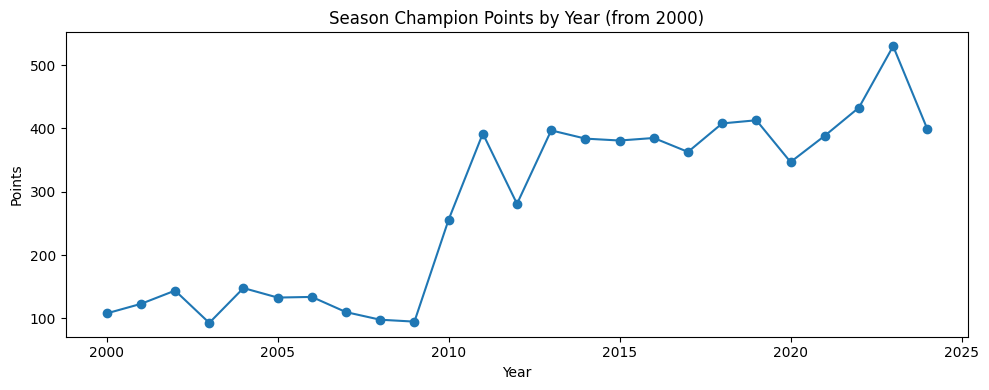

In [5]:
import pandas as pd, matplotlib.pyplot as plt

YEAR_MIN = 2000
merged = pd.read_csv("merged_F1.csv")
merged = merged[merged["year"] >= YEAR_MIN]

if merged.empty:
    print(f"No rows at or after {YEAR_MIN}. Check your data range.")
else:
    best = (merged.groupby(["year","driverName"], as_index=False)["points"].sum()
                  .sort_values(["year","points"], ascending=[True, False])
                  .groupby("year", as_index=False).first())

    print(best.to_string(index=False))
    best.to_csv(f"outputs/season_champions_from_{YEAR_MIN}.csv", index=False)

    plt.figure(figsize=(10,4))
    plt.plot(best["year"], best["points"], marker="o")
    plt.title(f"Season Champion Points by Year (from {YEAR_MIN})")
    plt.xlabel("Year"); plt.ylabel("Points")
    plt.tight_layout(); plt.show()

### F1 Constructors Champions (2000 - 2024)

 year     team  teamPoints
 2024  McLaren       609.0
 2023 Red Bull       790.0
 2022 Red Bull       724.0
 2021 Mercedes       604.5
 2020 Mercedes       573.0
 2019 Mercedes       739.0
 2018 Mercedes       655.0
 2017 Mercedes       668.0
 2016 Mercedes       765.0
 2015 Mercedes       703.0
 2014 Mercedes       701.0
 2013 Red Bull       596.0
 2012 Red Bull       460.0
 2011 Red Bull       650.0
 2010 Red Bull       498.0
 2009    Brawn       172.0
 2008  Ferrari       172.0
 2007  McLaren       218.0
 2006  Renault       206.0
 2005  Renault       191.0
 2004  Ferrari       262.0
 2003  Ferrari       158.0
 2002  Ferrari       221.0
 2001  Ferrari       179.0
 2000  Ferrari       170.0


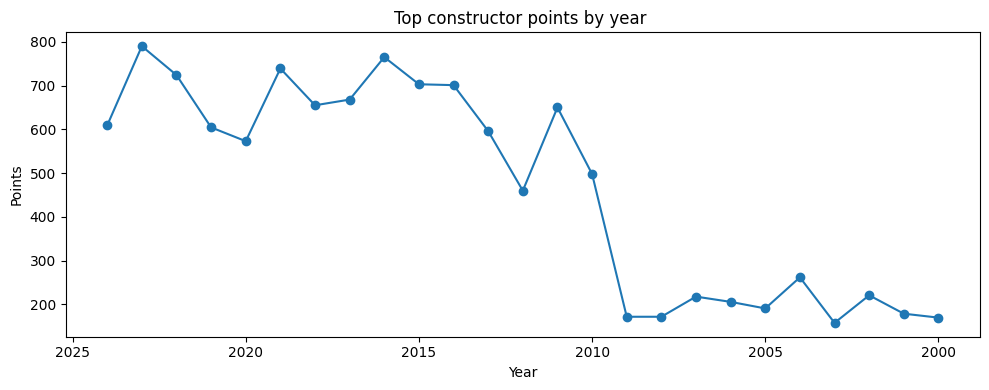

In [6]:
# Start from latest (print + plot)
import pandas as pd, matplotlib.pyplot as plt

m = pd.read_csv("merged_F1.csv")
c = (m.groupby(["year","constructorName"], as_index=False)["points"].sum()
       .sort_values(["year","points"], ascending=[True, False]))

# top team each year
champ = (c.groupby("year", as_index=False)
           .first()
           .rename(columns={"constructorName":"team","points":"teamPoints"}))

champ_latest = champ.sort_values("year", ascending=False)
print(champ_latest.head(25).to_string(index=False))

last = champ_latest.head(25)  # already latest-first
plt.figure(figsize=(10,4))
plt.plot(last["year"], last["teamPoints"], marker="o")
plt.gca().invert_xaxis()  # newest → oldest along x-axis
plt.title("Top constructor points by year ")
plt.xlabel("Year"); plt.ylabel("Points")
plt.tight_layout(); plt.show()

DNF Rate

constructorName  starts  dnfs  dnf_rate
       Mercedes     656    79  0.120427
 Manor Marussia      78    12  0.153846
       Marussia     109    17  0.155963
 Alpine F1 Team     180    29  0.161111
     AlphaTauri     166    27  0.162651
     BMW Sauber     140    23  0.164286
   Aston Martin     191    32  0.167539
   Racing Point      76    13  0.171053
       Red Bull     788   140  0.177665
   Haas F1 Team     380    76  0.200000
    Force India     424    88  0.207547
       Caterham     112    25  0.223214


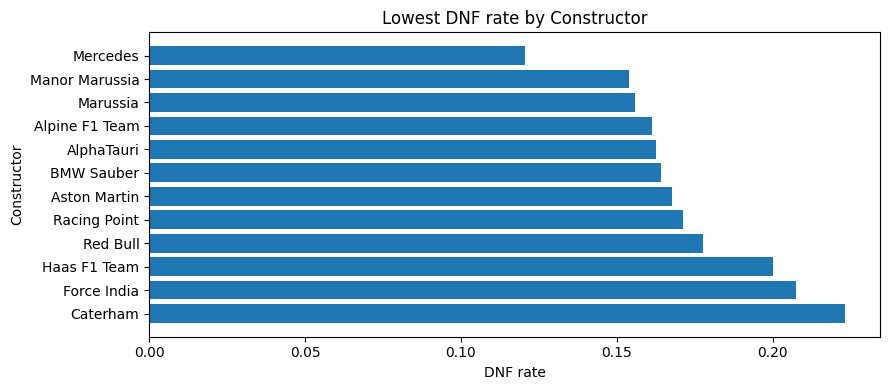

In [7]:
import os, pandas as pd, matplotlib.pyplot as plt

res_path = os.path.join(DATA_DIR, "results.csv") if "DATA_DIR" in globals() else "results.csv"
stat_path = os.path.join(DATA_DIR, "status.csv")  if "DATA_DIR" in globals() else "status.csv"

if not (os.path.exists(res_path) and os.path.exists(stat_path)):
    print("Skipping: need results.csv and status.csv in DATA_DIR.")
else:
    m    = pd.read_csv("merged_F1.csv")[["raceId","driverId","constructorName"]]
    res  = pd.read_csv(res_path)[["raceId","driverId","statusId"]]
    stat = pd.read_csv(stat_path)  # has labels like "Finished", "+1 Lap", "Accident"

    x = m.merge(res, on=["raceId","driverId"], how="left").merge(stat, on="statusId", how="left")
    classified = x["status"].fillna("").str.contains("Finished|Lap", case=False, regex=True)
    x["dnf"] = ~classified

    t = (x.groupby("constructorName", as_index=False)
           .agg(starts=("raceId","count"), dnfs=("dnf","sum"))
           .assign(dnf_rate=lambda d: d["dnfs"]/d["starts"])
           .query("starts >= 50")
           .sort_values("dnf_rate"))

    print(t.head(12).to_string(index=False))

    plt.figure(figsize=(9,4))
    plt.barh(t.head(12)["constructorName"][::-1], t.head(12)["dnf_rate"][::-1])
    plt.title("Lowest DNF rate by Constructor")
    plt.xlabel("DNF rate"); plt.ylabel("Constructor")
    plt.tight_layout(); plt.show()

Lap Analysis

In [8]:
import os, pandas as pd, numpy as np, matplotlib.pyplot as plt

DATA_DIR = "/content/f1_datasets/F1 Datasets"
lap_path  = os.path.join(DATA_DIR, "lap_times.csv")
race_path = os.path.join(DATA_DIR, "races.csv")
drv_path  = os.path.join(DATA_DIR, "drivers.csv")

assert os.path.exists(lap_path),  f"Missing: {lap_path}"
assert os.path.exists(race_path), f"Missing: {race_path}"
assert os.path.exists(drv_path),  f"Missing: {drv_path}"

laps = pd.read_csv(lap_path)        # columns: raceId, driverId, lap, time, milliseconds
races = pd.read_csv(race_path)      # columns: raceId, year, round, name, date, time
drivers = pd.read_csv(drv_path)     # columns: driverId, forename, surname

if "date" in races.columns:
    races["_date"] = pd.to_datetime(races["date"], errors="coerce")
    latest_race = races.sort_values(["_date","year","round"], ascending=[True, True, True]).dropna(subset=["_date"]).tail(1).iloc[0]
else:
    latest_race = races.sort_values(["year","round"], ascending=[True, True]).tail(1).iloc[0]

race_id  = int(latest_race["raceId"])
race_lbl = f"{int(latest_race.get('year', -1))} — {latest_race.get('name', 'Race')}"


drivers["driverName"] = drivers["forename"].astype(str).str.strip() + " " + drivers["surname"].astype(str).str.strip()
drivers = drivers[["driverId","driverName"]]

if "milliseconds" in laps.columns:
    laps["lap_ms"] = laps["milliseconds"]
else:
    # parse 'time' like "1:22.345" or "82.345"
    def to_ms(s):
        if pd.isna(s): return np.nan
        s = str(s)
        if ":" in s:
            mm, rest = s.split(":", 1)
            try: return (int(mm)*60 + float(rest)) * 1000.0
            except: return np.nan
        try: return float(s) * 1000.0
        except: return np.nan
    laps["lap_ms"] = laps["time"].apply(to_ms)

# focus on latest race
r = laps[laps["raceId"] == race_id].copy()
r = r.merge(drivers, on="driverId", how="left")

if r.empty:
    print("No lap data for the latest race. Check your files.")
else:



    top10_laps = (r.dropna(subset=["lap_ms"])
                    .sort_values("lap_ms")
                    .loc[:, ["driverName","lap","lap_ms"]]
                    .head(10))
    top10_laps["lap_sec"] = (top10_laps["lap_ms"]/1000.0).round(3)
    print("\nTop 10 fastest laps (overall):")
    print(top10_laps[["driverName","lap","lap_sec"]].to_string(index=False))

    # one fastest lap per driver (driver leaderboard)
    idx = r.dropna(subset=["lap_ms"]).groupby("driverName")["lap_ms"].idxmin()
    per_driver = (r.loc[idx, ["driverName","lap","lap_ms"]]
                    .sort_values("lap_ms")
                    .reset_index(drop=True))
    per_driver["lap_sec"] = (per_driver["lap_ms"]/1000.0).round(3)
    print("\nFastest lap per driver (leaderboard):")
    print(per_driver.head(10)[["driverName","lap","lap_sec"]].to_string(index=False))


Top 10 fastest laps (overall):
     driverName  lap  lap_sec
Kevin Magnussen   57   85.637
Kevin Magnussen   32   87.235
 Lewis Hamilton   44   87.278
 Lewis Hamilton   51   87.319
 Lewis Hamilton   54   87.342
 Lewis Hamilton   55   87.398
   Lando Norris   52   87.438
 Lewis Hamilton   49   87.490
   Lando Norris   53   87.520
 Lewis Hamilton   43   87.556

Fastest lap per driver (leaderboard):
     driverName  lap  lap_sec
Kevin Magnussen   57   85.637
 Lewis Hamilton   44   87.278
   Lando Norris   52   87.438
  Oscar Piastri   51   87.690
   Carlos Sainz   55   87.765
 Max Verstappen   56   87.765
Fernando Alonso   51   87.948
    Guanyu Zhou   56   87.982
Charles Leclerc   51   88.018
 George Russell   56   88.195


Personal Best Races of All time

In [9]:
import os, re, zipfile, pandas as pd

ZIP_PATH = "/content/F1 Datasets.zip"
EXTRACT_DIR = "/content/f1_datasets/F1 Datasets"

all_csvs = []
for r,_,fs in os.walk(EXTRACT_DIR):
    for f in fs:
        if f.lower().endswith(".csv"):
            p = os.path.join(r,f)
            all_csvs.append((p, p.lower()))
def find_file(keyword):
    for orig, low in all_csvs:
        if low.endswith(f"/{keyword}.csv"): return orig
    for orig, low in all_csvs:
        if keyword in low: return orig
    return None

paths = {k: find_file(k) for k in ["races","results","drivers","constructors","circuits"]}
assert all(paths.values()), f"Missing CSVs: {paths}"

# Load + merge minimal data with place info
races        = pd.read_csv(paths["races"])
results      = pd.read_csv(paths["results"])
drivers      = pd.read_csv(paths["drivers"])
constructors = pd.read_csv(paths["constructors"])
circuits     = pd.read_csv(paths["circuits"])

drivers["driverName"] = (drivers["forename"].astype(str).str.strip() + " " +
                         drivers["surname"].astype(str).str.strip()) if {"forename","surname"}.issubset(drivers.columns) \
                        else drivers[[c for c in drivers.columns if "name" in c.lower()][0]]

r_keep = [c for c in ["raceId","year","circuitId","name","date"] if c in races.columns]
c_keep = [c for c in ["circuitId","name","location","country"] if c in circuits.columns]
races_small = races[r_keep].rename(columns={"name":"raceName"}) if "name" in r_keep else races[r_keep]
circuits_small = circuits[c_keep].rename(columns={"name":"circuitName"}) if "name" in c_keep else circuits[c_keep]

m = (results
     .merge(races_small, on="raceId", how="left")
     .merge(drivers[["driverId","driverName"]], on="driverId", how="left")
     .merge(constructors[["constructorId","name"]].rename(columns={"name":"constructorName"}), on="constructorId", how="left")
     .merge(circuits_small, on="circuitId", how="left"))

m["finish_pos"] = m["positionOrder"] if "positionOrder" in m.columns else pd.to_numeric(m.get("position"), errors="coerce")
m["place"] = (m["circuitName"].astype(str) + " (" + m["location"].astype(str) + ", " + m["country"].astype(str) + ")"
              if {"circuitName","location","country"}.issubset(m.columns) else m.get("raceName",""))

# Winners with positions gained and top 10 lists
dfw = m[(m["finish_pos"] == 1) & (m["grid"] > 0)].copy()
dfw["positions_gained"] = dfw["grid"] - dfw["finish_pos"]

cols = [c for c in ["year","raceName","place","driverName","grid","finish_pos","positions_gained"] if c in dfw.columns]
top10_instances = dfw.sort_values("positions_gained", ascending=False)[cols].head(10).reset_index(drop=True)

idx = dfw.groupby("driverName")["positions_gained"].idxmax()
top_unique = dfw.loc[idx, cols].sort_values("positions_gained", ascending=False).head(10).reset_index(drop=True)

print("Top 10 winning comebacks instances")
print(top10_instances.to_string(index=False))

Top 10 winning comebacks instances
 year                      raceName                                             place         driverName  grid  finish_pos  positions_gained
 1983 United States Grand Prix West                      Long Beach (California, USA)        John Watson    22           1                21
 1954              Indianapolis 500   Indianapolis Motor Speedway (Indianapolis, USA)      Bill Vukovich    19           1                18
 2000             German Grand Prix              Hockenheimring (Hockenheim, Germany) Rubens Barrichello    18           1                17
 1982            Detroit Grand Prix             Detroit Street Circuit (Detroit, USA)        John Watson    17           1                16
 2005           Japanese Grand Prix                    Suzuka Circuit (Suzuka, Japan)     Kimi Räikkönen    17           1                16
 2024          São Paulo Grand Prix    Autódromo José Carlos Pace (São Paulo, Brazil)     Max Verstappen    17         